In [ ]:
from google.colab import files

uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('/content/train.csv')

print(df.head())


Saving train.csv to train.csv
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sal

In [ ]:

X = df[['GrLivArea']]
y = df['SalePrice']


print(X.isnull().sum())
print(y.isnull().sum())


GrLivArea    0
dtype: int64
0


In [ ]:
# training 80 and testing 20 sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (1168, 1)
Testing set size: (292, 1)


In [ ]:
# train
model = LinearRegression()
model.fit(X_train, y_train)


print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Intercept: 24899.74815733818
Coefficient: [102.48895892]


In [ ]:
# predictions
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 3418946311.180807
R² Score: 0.5542632452871117


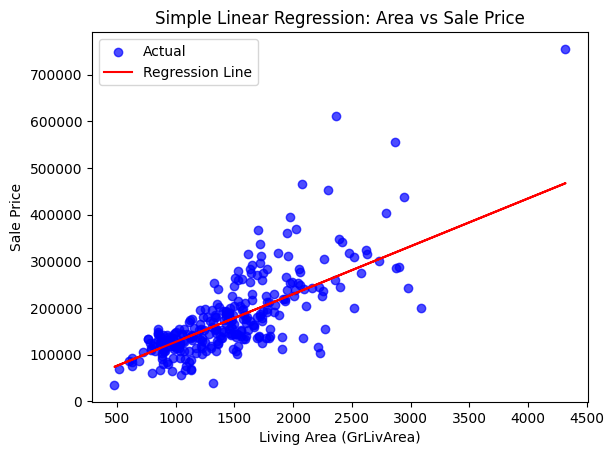

In [ ]:
# data points
plt.scatter(X_test, y_test, color='blue', alpha=0.7, label='Actual')

# regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')


plt.xlabel('Living Area (GrLivArea)')
plt.ylabel('Sale Price')
plt.title('Simple Linear Regression: Area vs Sale Price')
plt.legend()
plt.show()
